In [42]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib.path as mpath
import matplotlib.colors as col
from netCDF4 import Dataset
#import xgcm
from datetime import timedelta


import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

figdir = '/g/data/e14/pc5520/figures/basal_melt_param/'

In [43]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 6
Total threads: 24,Total memory: 96.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43527,Workers: 6
Dashboard: /proxy/8787/status,Total threads: 24
Started: Just now,Total memory: 96.00 GiB
Comm: tcp://127.0.0.1:40685,Total threads: 4
Dashboard: /proxy/42141/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:34873,


In [44]:
# database for control simulation:
master_session = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
control = '01deg_jra55v13_ryf9091'

# database for perturbations:
basal_session = cc.database.create_session('/g/data/v45/akm157/model_data/access-om2/01deg_jra55v13_ryf9091_easterlies_up10/easterlies.db')
# 10% increase in easterly wind speed:
easterlies_up = '01deg_jra55v13_ryf9091_easterlies_up10'
# 10% decrease in easterly wind speed:
easterlies_down = '01deg_jra55v13_ryf9091_easterlies_down10'

In [45]:
master_session = cc.database.create_session()

control = '01deg_jra55v13_ryf9091'

# salterature of meltwater at the freezing point calculated with the in situ salinity:
#Tfreezing_insituS = 'accessom2-GPC004'
# temperature of meltwater at the freezing point calculated with the 0 salinity:
#Tfreezing_zeroS = 'accessom2-GPC005'
# temperature of meltwater equal to the minimum of the above two temperatures:
#Tfreezing_min = 'accessom2-GPC006'
#Tfreezing_min_bg03 = 'accessom2-GPC007'
# temperature of meltwater equal to  min( Tfreezing(s=0),Tinsitu)
#Tfreezing_min_s0 = 'accessom2-GPC008'
# calving = 0.5 * runoff, no basal
#nobasal = 'accessom2-GPC009'
# realistic calving + conservative temperature + tfreezing as in GPC006
#Tfreezing_min_calv = 'accessom2-GPC012'
# realistic calving + conservative temperature + tfreezing as in GPC006 / calving put in runoff array - test
Tfreezing_min_calv_2 = 'accessom2-GPC013'
# idem as GPC013 but gade line formulation
Tfreezing_min_calv_2_gade = 'accessom2-GPC015'


start_time='2152-01-01'
end_time='2153-01-01'

lat_slice = slice(-90,-59)
lon_slice = slice(-280,80)
isobath_depth = 1000

In [46]:
# build database for these experiments:
session_name = '/g/data/e14/pc5520/model_data/access-om2/basal_melt_MOM5/basal_melt_MOM5.db'
basal_melt_session = cc.database.create_session(session_name)

#dir_list = ['/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC004/',
#           '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC005/',
#           '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC006/',
#           '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC007/',
#           '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC008/',
#           '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC009/',
#           '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC012/',
#           '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC013/']

dir_list = ['/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC013/',
           '/g/data/e14/pc5520/access-om2/archive/01deg_jra55v13_ryf9091_rerun_for_easterlies/accessom2-GPC015/']
cc.database.build_index(dir_list,basal_melt_session)

Indexing experiment: accessom2-GPC013


OperationalError: (sqlite3.OperationalError) attempt to write a readonly database
[SQL: DELETE FROM ncfiles WHERE ? = ncfiles.experiment_id AND (ncfiles.ncfile NOT IN (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?) OR ncfiles.present = 0 OR 1 != 1)]
[parameters: (1, 'restart1016/ocean/ocean_thickness.res.nc', 'output1011/ice/OUTPUT/iceh.2152-08.nc', 'output1026/ocean/rregionocean_monthly_2d_basal.nc', 'restart1007/ocean/ocean_temp_salt.res.nc', 'restart1013/ocean/ocean_temp_salt.res.nc', 'restart1012/ice/u_star.nc', 'output1011/ocean/ocean_grid.nc', 'restart1025/ocean/ocean_barotropic.res.nc', 'output1003/ocean/ocean_scalar.nc', 'restart1007/ocean/ocean_pot_temp.res.nc', 'output1012/ice/OUTPUT/iceh.2152-09.nc', 'restart1029/ice/sicemass.nc', 'output1013/ice/OUTPUT/iceh.2152-11.nc', 'output997/ocean/rregionocean_monthly_2d_basal.nc', 'restart1024/ice/u_star.nc', 'restart999/ocean/ocean_age.res.nc', 'restart1026/ice/sicemass.nc', 'restart1007/ice/i2o.nc', 'output997/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1026/ice/OUTPUT/iceh.2155-02.nc', 'output1016/ice/OUTPUT/iceh.2153-05.nc', 'restart1030/ice/kmt.nc', 'output1023/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1006/ocean/ocean_velocity.res.nc', 'restart1029/ice/u_star.nc', 'restart1010/ocean/ocean_barotropic.res.nc', 'output1020/ocean/rregionocean_daily_3d_salt.nc', 'output1003/ocean/ocean_grid.nc', 'restart1016/ocean/ocean_sbc.res.nc', 'restart1003/ice/sicemass.nc', 'output1025/ocean/ocean_grid.nc', 'restart1005/ocean/ocean_age.res.nc', 'output1028/ocean/ocean_monthly_3d_basal.nc', 'restart996/ocean/ocean_velocity_advection.res.nc', 'restart1016/ice/i2o.nc', 'restart1025/ocean/ocean_pot_temp.res.nc', 'output1029/ocean/rregionocean_daily_3d_salt.nc', 'restart1000/ocean/ocean_velocity.res.nc', 'output1029/ocean/ocean_daily.nc', 'restart1025/ice/o2i.nc', 'restart1014/ice/kmt.nc', 'restart1009/ice/grid.nc', 'output1027/ocean/rregionocean_daily_3d_temp.nc', 'output999/ocean/ocean_grid.nc', 'restart1028/ocean/ocean_velocity_advection.res.nc', 'output1008/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1002/ice/iced.2151-03-01-00000.nc', 'restart1022/ice/kmt.nc', 'restart1004/ocean/ocean_sbc.res.nc', 'output1018/ice/OUTPUT/iceh.2153-10.nc', 'restart997/ice/iced.2150-05-01-00000.nc', 'output1024/ocean/o2i.nc', 'restart1022/ice/sicemass.nc', 'output1010/ice/OUTPUT/iceh.2152-05.nc', 'output1002/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1016/ocean/ocean_barotropic.res.nc', 'output998/ocean/ocean_daily.nc', 'output1011/ocean/rregionocean_daily_3d_temp.nc', 'restart1011/ice/sicemass.nc', 'restart1011/ocean/ocean_density.res.nc', 'output1023/ocean/rregionocean_monthly_2d_basal.nc', 'restart1006/ocean/ocean_bih_friction.res.nc', 'restart1016/ice/grid.nc', 'output1010/ocean/ocean_scalar.nc', 'restart1023/ice/iced.2154-09-01-00000.nc', 'restart1030/ocean/ocean_temp_salt.res.nc', 'output1026/ocean/ocean_daily.nc', 'restart1001/ocean/ocean_thickness.res.nc', 'output1001/ice/OUTPUT/iceh.2150-12.nc', 'output1026/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1021/ocean/ocean_density.res.nc', 'restart1000/ocean/ocean_density.res.nc', 'output1009/ocean/rregionocean_daily_3d_salt.nc', 'output1028/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1009/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1016/ocean/ocean_scalar.nc', 'restart1021/ice/grid.nc', 'output1008/ocean/ocean_monthly_3d_basal.nc', 'output997/ice/OUTPUT/iceh.2150-03.nc', 'restart998/ice/iced.2150-07-01-00000.nc', 'output1023/ocean/rregionocean_daily_3d_temp.nc', 'restart1026/ice/grid.nc', 'output1005/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1021/ocean/ocean_month.nc', 'output1031/ocean/o2i.nc', 'output1017/ocean/ocean.nc', 'output1012/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1021/ice/iced.2154-04-01-00000.nc', 'restart999/ocean/ocean_frazil.res.nc', 'restart1025/ice/u_star.nc', 'output1030/ocean/ocean_grid.nc', 'restart1010/ice/o2i.nc', 'output1014/ocean/o2i.nc', 'output998/ocean/ocean_month.nc', 'output1006/ocean/ocean_scalar.nc', 'restart998/ocean/ocean_age.res.nc', 'output1002/ocean/ocean_daily.nc', 'output1013/ocean/ocean_monthly_3d_basal.nc', 'output1009/ocean/ocean_monthly_3d_basal.nc', 'restart1005/ocean/ocean_thickness.res.nc', 'restart1002/ocean/ocean_age.res.nc', 'restart1016/ice/iced.2153-07-01-00000.nc', 'restart1025/ocean/ocean_thickness.res.nc', 'output1013/ocean/ocean_scalar.nc', 'output997/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output998/ocean/rregionocean_daily_3d_salt.nc', 'restart1009/ice/o2i.nc', 'output1000/ocean/rregionocean_daily_3d_temp.nc', 'output999/ocean/ocean_scalar.nc', 'restart1015/ice/i2o.nc', 'restart1015/ice/iced.2153-04-01-00000.nc', 'output1022/ocean/ocean_monthly_3d_basal.nc', 'restart1021/ocean/ocean_pot_temp.res.nc', 'output1019/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1022/ocean/ocean_temp_salt.res.nc', 'restart1011/ocean/ocean_velocity.res.nc', 'restart1011/ocean/ocean_thickness.res.nc', 'restart1016/ice/u_star.nc', 'restart1026/ocean/ocean_sbc.res.nc', 'restart1005/ocean/ocean_temp_salt.res.nc', 'restart1004/ice/sicemass.nc', 'output1013/ocean/ocean.nc', 'restart1000/ocean/ocean_velocity_advection.res.nc', 'output1030/ocean/rregionocean_daily_3d_temp.nc', 'output1020/ocean/ocean_scalar.nc', 'output1008/ocean/rregionocean_daily_3d_salt.nc', 'restart1025/ocean/ocean_sbc.res.nc', 'restart1017/ice/monthly_sstsss.nc', 'output1022/ice/OUTPUT/iceh.2154-06.nc', 'restart1017/ocean/ocean_thickness.res.nc', 'restart1009/ice/iced.2152-05-01-00000.nc', 'restart997/ice/i2o.nc', 'output1023/ocean/rregionocean_daily_3d_salt.nc', 'restart996/ocean/ocean_frazil.res.nc', 'output1008/ocean/rregionocean_daily_3d_temp.nc', 'restart1007/ocean/ocean_age.res.nc', 'restart1013/ice/grid.nc', 'restart1027/ice/o2i.nc', 'restart1026/ocean/ocean_temp_salt.res.nc', 'output997/ocean/ocean_month.nc', 'output1016/ocean/rregionocean_daily_3d_temp.nc', 'output1001/ocean/rregionocean_daily_3d_temp.nc', 'output1010/ocean/rregionocean_monthly_2d_basal.nc', 'restart1011/ocean/ocean_pot_temp.res.nc', 'output999/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1018/ocean/ocean_grid.nc', 'restart1005/ice/monthly_sstsss.nc', 'restart1017/ice/iced.2153-09-01-00000.nc', 'output1002/ocean/rregionocean_daily_3d_salt.nc', 'output1002/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1013/ice/OUTPUT/iceh.2152-12.nc', 'restart1024/ocean/ocean_bih_friction.res.nc', 'output1031/ocean/ocean_month.nc', 'restart1005/ocean/ocean_density.res.nc', 'restart998/ocean/ocean_density.res.nc', 'restart996/ice/u_star.nc', 'output1015/ocean/o2i.nc', 'output1001/ocean/ocean_month.nc', 'restart1023/ocean/ocean_velocity.res.nc', 'restart1003/ice/monthly_sstsss.nc', 'restart1017/ice/grid.nc', 'restart1013/ocean/ocean_age.res.nc', 'output1017/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1002/ocean/ocean_bih_friction.res.nc', 'restart1000/ice/grid.nc', 'output998/ocean/ocean.nc', 'restart999/ice/sicemass.nc', 'output1021/ocean/ocean_scalar.nc', 'output1008/ocean/rregionocean_monthly_2d_basal.nc', 'restart1018/ocean/ocean_thickness.res.nc', 'output999/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1001/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1004/ocean/ocean_velocity_advection.res.nc', 'output1025/ocean/rregionocean_daily_3d_salt.nc', 'restart996/ocean/ocean_bih_friction.res.nc', 'output1022/ocean/rregionocean_daily_3d_salt.nc', 'restart1022/ice/u_star.nc', 'output1010/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1000/ocean/o2i.nc', 'restart999/ocean/ocean_sbc.res.nc', 'output1009/ocean/ocean_scalar.nc', 'output1027/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output999/ocean/ocean_daily.nc', 'output1025/ocean/rregionocean_daily_3d_temp.nc', 'restart1010/ocean/ocean_sbc.res.nc', 'restart1017/ice/sicemass.nc', 'restart1003/ocean/ocean_age.res.nc', 'restart1020/ocean/ocean_velocity.res.nc', 'restart1000/ocean/ocean_frazil.res.nc', 'output1011/ocean/ocean_daily.nc', 'restart1012/ice/grid.nc', 'restart1015/ocean/ocean_sbc.res.nc', 'restart1022/ice/i2o.nc', 'output1023/ocean/ocean_daily.nc', 'restart1010/ice/sicemass.nc', 'restart1024/ice/o2i.nc', 'restart1028/ice/monthly_sstsss.nc', 'output1000/ocean/ocean_scalar.nc', 'restart1016/ice/sicemass.nc', 'restart1004/ocean/ocean_pot_temp.res.nc', 'output1030/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1024/ice/OUTPUT/iceh.2154-10.nc', 'output1024/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1025/ocean/ocean_daily.nc', 'output1021/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1029/ocean/o2i.nc', 'output1013/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1001/ice/grid.nc', 'restart1017/ocean/ocean_barotropic.res.nc', 'restart1020/ocean/ocean_velocity_advection.res.nc', 'output1011/ocean/rregionocean_monthly_2d_basal.nc', 'restart1028/ice/iced.2155-07-01-00000.nc', 'output1002/ice/OUTPUT/iceh.2151-02.nc', 'restart1023/ocean/ocean_barotropic.res.nc', 'restart1007/ice/grid.nc', 'restart1023/ice/i2o.nc', 'output1008/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart996/ice/monthly_sstsss.nc', 'output1015/ocean/ocean.nc', 'output1024/ocean/ocean_daily.nc', 'output1031/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1000/ocean/rregionocean_monthly_2d_basal.nc', 'output1002/ocean/ocean_grid.nc', 'output1006/ice/OUTPUT/iceh.2151-09.nc', 'output1020/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1025/ocean/ocean_velocity_advection.res.nc', 'output1028/ice/OUTPUT/iceh.2155-06.nc', 'restart1016/ocean/ocean_velocity.res.nc', 'restart1026/ice/o2i.nc', 'output1002/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1016/ocean/ocean_bih_friction.res.nc', 'output1018/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1008/ice/iced.2152-03-01-00000.nc', 'restart1013/ocean/ocean_barotropic.res.nc', 'restart1015/ice/grid.nc', 'output1000/ocean/rregionocean_daily_3d_salt.nc', 'output1007/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1015/ocean/ocean_temp_salt.res.nc', 'restart1011/ocean/ocean_sbc.res.nc', 'restart1010/ice/grid.nc', 'output1007/ocean/ocean.nc', 'restart998/ocean/ocean_barotropic.res.nc', 'restart1004/ice/o2i.nc', 'restart1002/ocean/ocean_thickness.res.nc', 'restart1029/ice/iced.2155-09-01-00000.nc', 'output1031/ice/OUTPUT/iceh.2155-12.nc', 'output998/ice/OUTPUT/iceh.2150-05.nc', 'restart1025/ice/i2o.nc', 'output1001/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1017/ocean/ocean_density.res.nc', 'restart998/ice/u_star.nc', 'output1008/ocean/ocean_daily.nc', 'restart998/ice/sicemass.nc', 'output1024/ocean/rregionocean_daily_3d_salt.nc', 'output1004/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1026/ice/OUTPUT/iceh.2155-01.nc', 'restart1030/ice/monthly_sstsss.nc', 'output1018/ocean/rregionocean_daily_3d_salt.nc', 'restart1022/ice/o2i.nc', 'restart1021/ice/u_star.nc', 'output1006/ocean/o2i.nc', 'restart1006/ocean/ocean_age.res.nc', 'output997/ocean/ocean.nc', 'restart1008/ice/u_star.nc', 'restart1013/ocean/ocean_frazil.res.nc', 'restart1010/ice/u_star.nc', 'output1015/ice/OUTPUT/iceh.2153-04.nc', 'output1014/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1019/ocean/ocean_scalar.nc', 'output1010/ocean/ocean_month.nc', 'restart1011/ocean/ocean_frazil.res.nc', 'output1021/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1026/ocean/ocean_bih_friction.res.nc', 'restart1021/ice/sicemass.nc', 'restart1030/ice/iced.2155-10-01-00000.nc', 'restart1001/ocean/ocean_pot_temp.res.nc', 'restart1009/ocean/ocean_frazil.res.nc', 'output1010/ocean/rregionocean_daily_3d_salt.nc', 'restart1028/ocean/ocean_thickness.res.nc', 'output1013/ocean/ocean_grid.nc', 'restart1018/ice/grid.nc', 'restart1002/ice/kmt.nc', 'output1001/ocean/rregionocean_monthly_2d_basal.nc', 'restart996/ocean/ocean_density.res.nc', 'output1006/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1030/ocean/ocean_monthly_3d_basal.nc', 'restart997/ocean/ocean_velocity.res.nc', 'output1015/ocean/ocean_grid.nc', 'restart1023/ice/sicemass.nc', 'output1028/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1008/ice/grid.nc', 'restart1029/ice/kmt.nc', 'restart1006/ocean/ocean_barotropic.res.nc', 'restart1019/ice/sicemass.nc', 'restart1002/ocean/ocean_temp_salt.res.nc', 'output1024/ocean/ocean_month.nc', 'restart1005/ice/iced.2151-09-01-00000.nc', 'output1027/ice/OUTPUT/iceh.2155-04.nc', 'restart1026/ocean/ocean_velocity_advection.res.nc', 'output1007/ocean/ocean_grid.nc', 'output996/ocean/ocean_scalar.nc', 'output1018/ice/OUTPUT/iceh.2153-09.nc', 'output1023/ice/OUTPUT/iceh.2154-07.nc', 'output1022/ocean/ocean_scalar.nc', 'restart999/ocean/ocean_velocity_advection.res.nc', 'restart1005/ice/u_star.nc', 'output999/ocean/ocean_month.nc', 'output1014/ice/OUTPUT/iceh.2153-02.nc', 'output1013/ocean/rregionocean_daily_3d_temp.nc', 'restart1027/ice/iced.2155-04-01-00000.nc', 'restart1002/ice/i2o.nc', 'output1004/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1022/ocean/o2i.nc', 'output1008/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart999/ocean/ocean_thickness.res.nc', 'restart1031/ice/monthly_sstsss.nc', 'restart1022/ocean/ocean_barotropic.res.nc', 'restart1013/ice/kmt.nc', 'restart1015/ocean/ocean_age.res.nc', 'output1026/ocean/ocean_scalar.nc', 'restart1014/ice/o2i.nc', 'restart1022/ocean/ocean_age.res.nc', 'output1021/ocean/rregionocean_daily_3d_temp.nc', 'output1009/ocean/ocean_daily.nc', 'restart1007/ice/u_star.nc', 'restart1013/ocean/ocean_pot_temp.res.nc', 'restart1018/ice/iced.2153-10-01-00000.nc', 'restart1021/ice/monthly_sstsss.nc', 'output1010/ocean/ocean_grid.nc', 'output1015/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1009/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1009/ice/OUTPUT/iceh.2152-04.nc', 'restart997/ice/kmt.nc', 'output1005/ice/OUTPUT/iceh.2151-07.nc', 'restart997/ocean/ocean_pot_temp.res.nc', 'output1006/ocean/rregionocean_daily_3d_salt.nc', 'output1028/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1026/ocean/ocean_age.res.nc', 'output1011/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1031/ocean/ocean.nc', 'output1018/ocean/ocean_scalar.nc', 'restart1017/ice/u_star.nc', 'restart1030/ocean/ocean_sbc.res.nc', 'restart1024/ocean/ocean_density.res.nc', 'restart998/ocean/ocean_bih_friction.res.nc', 'restart1010/ice/monthly_sstsss.nc', 'restart1005/ocean/ocean_velocity.res.nc', 'output999/ice/OUTPUT/iceh.2150-07.nc', 'output1010/ocean/o2i.nc', 'output1027/ocean/ocean_scalar.nc', 'restart1000/ice/i2o.nc', 'restart1031/ice/o2i.nc', 'output1029/ice/OUTPUT/iceh.2155-07.nc', 'restart1004/ice/iced.2151-07-01-00000.nc', 'output1010/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1005/ocean/ocean_pot_temp.res.nc', 'restart997/ocean/ocean_barotropic.res.nc', 'output1011/ocean/ocean.nc', 'output1017/ocean/ocean_monthly_3d_basal.nc', 'restart1014/ice/i2o.nc', 'restart1009/ocean/ocean_velocity_advection.res.nc', 'restart1000/ocean/ocean_bih_friction.res.nc', 'restart1029/ice/monthly_sstsss.nc', 'restart1010/ocean/ocean_thickness.res.nc', 'output1020/ocean/rregionocean_monthly_2d_basal.nc', 'output1030/ice/OUTPUT/iceh.2155-10.nc', 'output1000/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart998/ice/o2i.nc', 'restart1000/ice/o2i.nc', 'output1006/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1031/ice/sicemass.nc', 'output1014/ocean/ocean_monthly_3d_basal.nc', 'output1011/ice/OUTPUT/iceh.2152-07.nc', 'output998/ocean/rregionocean_monthly_2d_basal.nc', 'output1004/ocean/rregionocean_daily_3d_salt.nc', 'restart1005/ocean/ocean_bih_friction.res.nc', 'restart1007/ocean/ocean_velocity_advection.res.nc', 'restart1027/ocean/ocean_thickness.res.nc', 'output998/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1030/ice/grid.nc', 'restart1006/ocean/ocean_temp_salt.res.nc', 'output1013/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1015/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1024/ice/kmt.nc', 'restart1011/ice/u_star.nc', 'output1031/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1005/ocean/ocean_daily.nc', 'restart997/ice/o2i.nc', 'restart1004/ocean/ocean_temp_salt.res.nc', 'restart1028/ocean/ocean_bih_friction.res.nc', 'output998/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1013/ocean/ocean_month.nc', 'output1028/ocean/ocean_grid.nc', 'output1022/ocean/rregionocean_daily_3d_temp.nc', 'output1025/ocean/ocean.nc', 'output1019/ocean/ocean_daily.nc', 'restart1018/ice/iced.2153-11-01-00000.nc', 'restart1019/ocean/ocean_sbc.res.nc', 'output1031/ocean/rregionocean_daily_3d_salt.nc', 'output997/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1026/ocean/rregionocean_daily_3d_salt.nc', 'restart1000/ocean/ocean_temp_salt.res.nc', 'output1029/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1007/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1002/ice/grid.nc', 'restart998/ocean/ocean_temp_salt.res.nc', 'restart1012/ice/o2i.nc', 'restart1020/ice/monthly_sstsss.nc', 'restart1021/ocean/ocean_thickness.res.nc', 'restart1020/ice/kmt.nc', 'restart1016/ice/o2i.nc', 'restart999/ocean/ocean_barotropic.res.nc', 'output1029/ocean/ocean_monthly_3d_basal.nc', 'restart1023/ocean/ocean_velocity_advection.res.nc', 'output1014/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1005/ocean/o2i.nc', 'restart999/ice/kmt.nc', 'output1014/ocean/rregionocean_daily_3d_salt.nc', 'output1022/ocean/ocean_month.nc', 'restart1021/ocean/ocean_bih_friction.res.nc', 'restart1016/ice/kmt.nc', 'output1020/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1020/ocean/ocean_barotropic.res.nc', 'restart996/ocean/ocean_barotropic.res.nc', 'output1009/ocean/ocean_grid.nc', 'output1021/ice/OUTPUT/iceh.2154-04.nc', 'restart1005/ice/i2o.nc', 'restart1004/ice/u_star.nc', 'output1002/ocean/rregionocean_monthly_2d_basal.nc', 'output1029/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1015/ocean/rregionocean_daily_3d_temp.nc', 'output1026/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1031/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output998/ocean/o2i.nc', 'output1025/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1030/ocean/ocean_thickness.res.nc', 'restart1013/ocean/ocean_thickness.res.nc', 'restart1024/ocean/ocean_barotropic.res.nc', 'output1030/ocean/ocean.nc', 'restart1001/ocean/ocean_frazil.res.nc', 'output1003/ocean/ocean_month.nc', 'output1004/ocean/ocean.nc', 'restart1024/ice/grid.nc', 'output1028/ocean/rregionocean_monthly_2d_basal.nc', 'output996/ice/OUTPUT/iceh.2150-02.nc', 'restart999/ocean/ocean_bih_friction.res.nc', 'output1009/ocean/rregionocean_monthly_2d_basal.nc', 'restart1006/ice/iced.2151-10-01-00000.nc', 'output1014/ocean/ocean_daily.nc', 'output1016/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output997/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart997/ice/grid.nc', 'restart1009/ice/i2o.nc', 'output996/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1009/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1002/ocean/ocean.nc', 'output1024/ocean/rregionocean_daily_3d_temp.nc', 'restart996/ocean/ocean_temp_salt.res.nc', 'restart1018/ice/o2i.nc', 'restart1021/ocean/ocean_velocity_advection.res.nc', 'restart1019/ocean/ocean_pot_temp.res.nc', 'output1031/ocean/ocean_daily.nc', 'restart1007/ice/kmt.nc', 'restart1015/ocean/ocean_density.res.nc', 'restart1025/ocean/ocean_frazil.res.nc', 'restart1001/ocean/ocean_sbc.res.nc', 'output1028/ocean/ocean_month.nc', 'restart1023/ocean/ocean_age.res.nc', 'output1004/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1023/ocean/ocean_scalar.nc', 'restart1020/ocean/ocean_sbc.res.nc', 'restart1013/ice/monthly_sstsss.nc', 'restart1022/ice/grid.nc', 'output1008/ocean/ocean_month.nc', 'output1015/ice/OUTPUT/iceh.2153-03.nc', 'restart997/ice/monthly_sstsss.nc', 'restart996/ice/sicemass.nc', 'output998/ocean/ocean_monthly_3d_basal.nc', 'restart1013/ocean/ocean_sbc.res.nc', 'restart1003/ocean/ocean_frazil.res.nc', 'output1012/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1006/ocean/ocean_month.nc', 'output1024/ocean/ocean.nc', 'output1009/ice/OUTPUT/iceh.2152-03.nc', 'restart1009/ocean/ocean_pot_temp.res.nc', 'restart1004/ocean/ocean_age.res.nc', 'restart1028/ocean/ocean_velocity.res.nc', 'restart1025/ice/monthly_sstsss.nc', 'output1003/ice/OUTPUT/iceh.2151-04.nc', 'restart1020/ice/u_star.nc', 'output1001/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1025/ice/grid.nc', 'restart1023/ice/o2i.nc', 'output1016/ocean/ocean_daily.nc', 'restart1031/ice/iced.2156-01-01-00000.nc', 'output1003/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1007/ice/OUTPUT/iceh.2151-12.nc', 'output997/ocean/rregionocean_daily_3d_temp.nc', 'restart1029/ice/grid.nc', 'output996/ocean/rregionocean_monthly_2d_basal.nc', 'output1020/ocean/rregionocean_daily_3d_temp.nc', 'restart1007/ocean/ocean_velocity.res.nc', 'output1023/ocean/ocean.nc', 'output1006/ice/OUTPUT/iceh.2151-10.nc', 'restart1026/ice/u_star.nc', 'output1019/ice/OUTPUT/iceh.2153-12.nc', 'output1017/ocean/ocean_month.nc', 'restart1030/ocean/ocean_velocity.res.nc', 'output1014/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1027/ocean/ocean_velocity_advection.res.nc', 'restart1021/ocean/ocean_velocity.res.nc', 'restart1012/ice/i2o.nc', 'output1007/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1016/ocean/ocean_age.res.nc', 'restart1021/ocean/ocean_age.res.nc', 'output1006/ocean/ocean.nc', 'output1030/ocean/ocean_scalar.nc', 'output1028/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1003/ice/OUTPUT/iceh.2151-03.nc', 'restart1023/ocean/ocean_thickness.res.nc', 'restart1003/ocean/ocean_bih_friction.res.nc', 'output996/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart999/ice/o2i.nc', 'output1016/ocean/ocean.nc', 'restart1028/ice/grid.nc', 'restart1030/ocean/ocean_density.res.nc', 'output998/ocean/ocean_grid.nc', 'output998/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1019/ocean/ocean_bih_friction.res.nc', 'restart1010/ice/kmt.nc', 'restart1000/ocean/ocean_barotropic.res.nc', 'output1007/ocean/ocean_daily.nc', 'restart1003/ice/u_star.nc', 'output1004/ocean/ocean_daily.nc', 'output1011/ocean/rregionocean_daily_3d_salt.nc', 'output998/ice/OUTPUT/iceh.2150-06.nc', 'restart1001/ice/iced.2151-01-01-00000.nc', 'restart999/ocean/ocean_density.res.nc', 'output1006/ocean/ocean_daily.nc', 'output1006/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1001/ice/monthly_sstsss.nc', 'output1008/ocean/o2i.nc', 'output998/ocean/rregionocean_daily_3d_temp.nc', 'output1017/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1030/ocean/ocean_pot_temp.res.nc', 'restart1025/ice/iced.2155-01-01-00000.nc', 'output1025/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1012/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1030/ice/u_star.nc', 'restart1025/ice/sicemass.nc', 'output1025/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1026/ice/i2o.nc', 'output1029/ocean/rregionocean_monthly_2d_basal.nc', 'output1023/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1014/ocean/ocean.nc', 'restart1028/ice/u_star.nc', 'restart1006/ice/sicemass.nc', 'output1011/ocean/ocean_monthly_3d_basal.nc', 'restart1006/ocean/ocean_density.res.nc', 'output1020/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1030/ice/iced.2155-11-01-00000.nc', 'output1018/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output997/ocean/o2i.nc', 'restart1001/ocean/ocean_age.res.nc', 'restart1014/ice/u_star.nc', 'restart1001/ocean/ocean_bih_friction.res.nc', 'output1005/ocean/ocean_monthly_3d_basal.nc', 'restart1018/ocean/ocean_temp_salt.res.nc', 'restart1002/ocean/ocean_velocity_advection.res.nc', 'restart1030/ocean/ocean_barotropic.res.nc', 'restart1010/ocean/ocean_pot_temp.res.nc', 'restart1003/ice/grid.nc', 'output997/ocean/ocean_monthly_3d_basal.nc', 'restart1019/ocean/ocean_velocity.res.nc', 'restart1019/ocean/ocean_age.res.nc', 'restart1005/ice/sicemass.nc', 'output1011/ocean/ocean_scalar.nc', 'output1005/ocean/ocean.nc', 'restart1015/ocean/ocean_pot_temp.res.nc', 'output1014/ocean/ocean_scalar.nc', 'restart1001/ocean/ocean_barotropic.res.nc', 'restart1009/ice/iced.2152-04-01-00000.nc', 'output1007/ocean/rregionocean_daily_3d_temp.nc', 'restart1013/ice/o2i.nc', 'restart1004/ocean/ocean_frazil.res.nc', 'restart1007/ocean/ocean_thickness.res.nc', 'restart997/ocean/ocean_sbc.res.nc', 'restart1003/ice/iced.2151-04-01-00000.nc', 'output1012/ocean/ocean_month.nc', 'output1017/ocean/rregionocean_monthly_2d_basal.nc', 'restart1030/ice/sicemass.nc', 'restart1009/ocean/ocean_temp_salt.res.nc', 'output1023/ocean/ocean_month.nc', 'output1012/ocean/ocean_scalar.nc', 'restart1025/ocean/ocean_bih_friction.res.nc', 'restart1026/ocean/ocean_pot_temp.res.nc', 'restart1006/ice/monthly_sstsss.nc', 'restart996/ice/kmt.nc', 'restart1013/ice/u_star.nc', 'output1003/ocean/ocean_daily.nc', 'restart1017/ocean/ocean_temp_salt.res.nc', 'output1020/ocean/ocean_daily.nc', 'output1008/ocean/ocean_grid.nc', 'output1024/ocean/ocean_monthly_3d_basal.nc', 'restart1022/ocean/ocean_sbc.res.nc', 'restart1021/ice/iced.2154-05-01-00000.nc', 'output996/ice/OUTPUT/iceh.2150-01.nc', 'restart1021/ocean/ocean_barotropic.res.nc', 'output1012/ocean/ocean.nc', 'output1005/ice/OUTPUT/iceh.2151-08.nc', 'output1021/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1001/ocean/ocean_velocity.res.nc', 'output1027/ice/OUTPUT/iceh.2155-03.nc', 'restart1001/ice/o2i.nc', 'output1021/ocean/rregionocean_monthly_2d_basal.nc', 'restart1028/ocean/ocean_temp_salt.res.nc', 'restart1007/ocean/ocean_density.res.nc', 'restart1013/ocean/ocean_velocity.res.nc', 'output1010/ocean/ocean.nc', 'restart1024/ice/iced.2154-10-01-00000.nc', 'restart1020/ocean/ocean_thickness.res.nc', 'output1015/ocean/ocean_scalar.nc', 'output1004/ocean/ocean_scalar.nc', 'output1015/ocean/ocean_monthly_3d_basal.nc', 'restart1023/ocean/ocean_pot_temp.res.nc', 'restart1022/ocean/ocean_density.res.nc', 'restart1007/ice/o2i.nc', 'output1024/ocean/ocean_grid.nc', 'output1001/ice/OUTPUT/iceh.2150-11.nc', 'output1024/ice/OUTPUT/iceh.2154-09.nc', 'output1017/ocean/o2i.nc', 'output1000/ocean/ocean_daily.nc', 'output1024/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1016/ocean/rregionocean_daily_3d_salt.nc', 'restart1006/ice/i2o.nc', 'output1022/ocean/rregionocean_monthly_2d_basal.nc', 'restart1015/ocean/ocean_frazil.res.nc', 'restart1011/ocean/ocean_bih_friction.res.nc', 'restart1015/ice/monthly_sstsss.nc', 'output1012/ocean/rregionocean_monthly_2d_basal.nc', 'output1005/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1018/ice/i2o.nc', 'output1027/ocean/ocean_daily.nc', 'output1021/ocean/ocean.nc', 'output999/ocean/ocean.nc', 'restart1031/ice/grid.nc', 'restart1027/ocean/ocean_barotropic.res.nc', 'restart1016/ocean/ocean_frazil.res.nc', 'output1002/ocean/o2i.nc', 'output1015/ocean/rregionocean_daily_3d_salt.nc', 'output1005/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1005/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1012/ocean/ocean_grid.nc', 'output1001/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1019/ocean/rregionocean_daily_3d_temp.nc', 'output1004/ocean/ocean_grid.nc', 'output1019/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1002/ice/OUTPUT/iceh.2151-01.nc', 'output1021/ocean/rregionocean_daily_3d_salt.nc', 'output1010/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output999/ice/OUTPUT/iceh.2150-08.nc', 'output1029/ocean/ocean_grid.nc', 'restart1003/ocean/ocean_thickness.res.nc', 'restart997/ocean/ocean_frazil.res.nc', 'output1016/ocean/o2i.nc', 'restart1007/ice/sicemass.nc', 'output1017/ice/OUTPUT/iceh.2153-08.nc', 'restart996/ocean/ocean_age.res.nc', 'output1022/ocean/ocean_daily.nc', 'output1031/ocean/ocean_monthly_3d_basal.nc', 'output1012/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1017/ice/o2i.nc', 'restart996/ocean/ocean_sbc.res.nc', 'output1029/ocean/rregionocean_daily_3d_temp.nc', 'output1024/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1024/ice/iced.2154-11-01-00000.nc', 'restart1006/ocean/ocean_frazil.res.nc', 'restart996/ocean/ocean_thickness.res.nc', 'restart1001/ocean/ocean_temp_salt.res.nc', 'restart1023/ocean/ocean_density.res.nc', 'output1010/ocean/ocean_daily.nc', 'output1009/ocean/o2i.nc', 'restart1024/ocean/ocean_pot_temp.res.nc', 'restart1022/ocean/ocean_pot_temp.res.nc', 'restart1018/ice/monthly_sstsss.nc', 'restart1025/ocean/ocean_density.res.nc', 'restart1005/ocean/ocean_sbc.res.nc', 'output1030/ocean/o2i.nc', 'output1020/ice/OUTPUT/iceh.2154-02.nc', 'restart1009/ocean/ocean_bih_friction.res.nc', 'restart1003/ice/i2o.nc', 'restart1009/ocean/ocean_age.res.nc', 'output1030/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1013/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1005/ocean/ocean_velocity_advection.res.nc', 'output1011/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output999/ocean/o2i.nc', 'output1026/ocean/ocean_grid.nc', 'restart1009/ocean/ocean_velocity.res.nc', 'restart1014/ice/sicemass.nc', 'restart1001/ocean/ocean_density.res.nc', 'restart1026/ocean/ocean_density.res.nc', 'restart998/ice/i2o.nc', 'restart1009/ice/u_star.nc', 'restart999/ice/i2o.nc', 'restart999/ice/monthly_sstsss.nc', 'restart1004/ocean/ocean_bih_friction.res.nc', 'output1019/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output997/ice/OUTPUT/iceh.2150-04.nc', 'output1009/ocean/ocean_month.nc', 'restart1015/ocean/ocean_barotropic.res.nc', 'restart999/ice/iced.2150-09-01-00000.nc', 'restart997/ocean/ocean_density.res.nc', 'output1016/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1022/ocean/ocean_frazil.res.nc', 'restart1009/ice/monthly_sstsss.nc', 'restart998/ocean/ocean_velocity_advection.res.nc', 'output1016/ice/OUTPUT/iceh.2153-06.nc', 'output998/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1021/ice/o2i.nc', 'restart1024/ice/monthly_sstsss.nc', 'output1007/ocean/rregionocean_monthly_2d_basal.nc', 'output1003/ocean/rregionocean_daily_3d_salt.nc', 'restart1020/ocean/ocean_temp_salt.res.nc', 'restart1011/ice/grid.nc', 'output1025/ocean/ocean_month.nc', 'output1026/ocean/ocean.nc', 'restart996/ice/iced.2150-03-01-00000.nc', 'restart1027/ocean/ocean_temp_salt.res.nc', 'output999/ocean/rregionocean_monthly_2d_basal.nc', 'output1004/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1023/ocean/ocean_temp_salt.res.nc', 'restart1006/ocean/ocean_thickness.res.nc', 'output1013/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1006/ocean/ocean_pot_temp.res.nc', 'restart996/ice/i2o.nc', 'restart1009/ice/kmt.nc', 'output1013/ocean/rregionocean_daily_3d_salt.nc', 'output1016/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1026/ocean/rregionocean_daily_3d_temp.nc', 'output1027/ocean/rregionocean_daily_3d_salt.nc', 'restart1020/ice/i2o.nc', 'restart1013/ice/i2o.nc', 'restart1019/ocean/ocean_density.res.nc', 'output1018/ocean/ocean_month.nc', 'output1029/ice/OUTPUT/iceh.2155-08.nc', 'restart1011/ice/monthly_sstsss.nc', 'output1025/ocean/o2i.nc', 'output1028/ocean/ocean_scalar.nc', 'restart1006/ice/o2i.nc', 'restart1023/ocean/ocean_frazil.res.nc', 'output1020/ocean/ocean.nc', 'restart1020/ocean/ocean_frazil.res.nc', 'restart1027/ocean/ocean_velocity.res.nc', 'restart1026/ice/iced.2155-03-01-00000.nc', 'restart1010/ice/iced.2152-07-01-00000.nc', 'output1026/ocean/ocean_month.nc', 'restart1027/ice/u_star.nc', 'restart1020/ocean/ocean_age.res.nc', 'restart1015/ocean/ocean_thickness.res.nc', 'restart1018/ocean/ocean_sbc.res.nc', 'restart996/ocean/ocean_velocity.res.nc', 'output1022/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart996/ice/o2i.nc', 'restart1018/ocean/ocean_barotropic.res.nc', 'restart1027/ice/grid.nc', 'output1008/ocean/ocean.nc', 'output1008/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1019/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1006/ocean/ocean_monthly_3d_basal.nc', 'restart1002/ocean/ocean_barotropic.res.nc', 'output1021/ocean/o2i.nc', 'restart1003/ocean/ocean_density.res.nc', 'output1003/ocean/rregionocean_daily_3d_temp.nc', 'restart1018/ocean/ocean_velocity_advection.res.nc', 'output1012/ice/OUTPUT/iceh.2152-10.nc', 'output1003/ocean/rregionocean_monthly_2d_basal.nc', 'output1015/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1013/ocean/rregionocean_monthly_2d_basal.nc', 'output1007/ocean/ocean_scalar.nc', 'restart1015/ice/o2i.nc', 'output1027/ocean/o2i.nc', 'output1001/ocean/ocean.nc', 'output1022/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1031/ocean/ocean_scalar.nc', 'output1004/ocean/ocean_monthly_3d_basal.nc', 'restart1002/ice/o2i.nc', 'restart1019/ice/iced.2154-01-01-00000.nc', 'output1017/ocean/ocean_scalar.nc', 'restart1002/ocean/ocean_density.res.nc', 'restart1002/ocean/ocean_sbc.res.nc', 'restart998/ocean/ocean_frazil.res.nc', 'restart1003/ocean/ocean_velocity_advection.res.nc', 'restart1020/ocean/ocean_bih_friction.res.nc', 'restart1000/ocean/ocean_pot_temp.res.nc', 'restart1013/ocean/ocean_velocity_advection.res.nc', 'output996/ocean/o2i.nc', 'output1018/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1019/ocean/ocean_grid.nc', 'restart1008/ice/monthly_sstsss.nc', 'restart1002/ice/u_star.nc', 'output1031/ocean/rregionocean_daily_3d_temp.nc', 'restart1003/ice/o2i.nc', 'output1027/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1013/ocean/ocean_daily.nc', 'output1019/ocean/ocean_month.nc', 'restart1010/ice/i2o.nc', 'restart1028/ocean/ocean_frazil.res.nc', 'output1020/ocean/ocean_month.nc', 'output1000/ice/OUTPUT/iceh.2150-10.nc', 'output1018/ocean/ocean_daily.nc', 'restart1018/ice/sicemass.nc', 'restart997/ice/sicemass.nc', 'output996/ocean/ocean.nc', 'output1002/ocean/ocean_scalar.nc', 'output1010/ocean/ocean_monthly_3d_basal.nc', 'output1017/ocean/rregionocean_daily_3d_temp.nc', 'restart1008/ice/sicemass.nc', 'restart1017/ocean/ocean_velocity.res.nc', 'output1020/ocean/o2i.nc', 'output1025/ocean/rregionocean_monthly_2d_basal.nc', 'output1012/ocean/ocean_daily.nc', 'restart1028/ice/i2o.nc', 'output1007/ice/OUTPUT/iceh.2151-11.nc', 'restart1006/ice/u_star.nc', 'output1009/ocean/rregionocean_daily_3d_temp.nc', 'restart1029/ice/o2i.nc', 'output1010/ocean/rregionocean_daily_3d_temp.nc', 'output1012/ocean/ocean_monthly_3d_basal.nc', 'output1027/ocean/ocean_grid.nc', 'output996/ocean/rregionocean_daily_3d_salt.nc', 'output1027/ocean/ocean_month.nc', 'output1016/ocean/ocean_month.nc', 'output1029/ocean/ocean_scalar.nc', 'restart1015/ice/kmt.nc', 'output997/ocean/ocean_scalar.nc', 'restart1019/ice/i2o.nc', 'restart1010/ocean/ocean_frazil.res.nc', 'output999/ocean/ocean_monthly_3d_basal.nc', 'restart1012/ice/iced.2152-10-01-00000.nc', 'restart1002/ice/sicemass.nc', 'output1023/ocean/ocean_grid.nc', 'restart1009/ocean/ocean_density.res.nc', 'restart1007/ice/iced.2152-01-01-00000.nc', 'restart1027/ocean/ocean_age.res.nc', 'output1018/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1020/ocean/ocean_grid.nc', 'output1006/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1030/ice/i2o.nc', 'output1011/ocean/o2i.nc', 'output1023/ocean/ocean_monthly_3d_basal.nc', 'restart1011/ice/kmt.nc', 'restart1004/ice/grid.nc', 'restart1027/ocean/ocean_density.res.nc', 'restart1021/ocean/ocean_temp_salt.res.nc', 'restart1005/ocean/ocean_barotropic.res.nc', 'output1020/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1029/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1025/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1019/ocean/rregionocean_monthly_2d_basal.nc', 'restart1014/ice/grid.nc', 'restart1002/ice/monthly_sstsss.nc', 'restart1005/ocean/ocean_frazil.res.nc', 'output1029/ocean/ocean_month.nc', 'output1018/ocean/rregionocean_monthly_2d_basal.nc', 'restart1000/ocean/ocean_age.res.nc', 'output1028/ice/OUTPUT/iceh.2155-05.nc', 'restart1011/ocean/ocean_velocity_advection.res.nc', 'restart1013/ocean/ocean_bih_friction.res.nc', 'restart1026/ocean/ocean_thickness.res.nc', 'restart1026/ocean/ocean_barotropic.res.nc', 'output1015/ocean/ocean_daily.nc', 'output1024/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1003/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1003/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1001/ocean/ocean_velocity_advection.res.nc', 'output1015/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1017/ocean/ocean_pot_temp.res.nc', 'restart1022/ocean/ocean_velocity.res.nc', 'output1011/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output996/ocean/ocean_month.nc', 'restart1001/ice/sicemass.nc', 'restart1005/ice/o2i.nc', 'restart1009/ocean/ocean_thickness.res.nc', 'output998/ocean/ocean_scalar.nc', 'restart1024/ocean/ocean_sbc.res.nc', 'restart996/ice/grid.nc', 'restart1023/ice/kmt.nc', 'restart999/ice/grid.nc', 'output1017/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1011/ocean/ocean_month.nc', 'restart1011/ice/i2o.nc', 'restart1006/ocean/ocean_sbc.res.nc', 'restart997/ocean/ocean_temp_salt.res.nc', 'output1012/ocean/rregionocean_daily_3d_salt.nc', 'restart1026/ice/monthly_sstsss.nc', 'restart1004/ocean/ocean_barotropic.res.nc', 'restart1020/ice/sicemass.nc', 'restart1017/ocean/ocean_bih_friction.res.nc', 'restart1006/ice/iced.2151-11-01-00000.nc', 'output996/ocean/ocean_daily.nc', 'restart1015/ice/iced.2153-05-01-00000.nc', 'restart1003/ice/kmt.nc', 'restart1025/ocean/ocean_temp_salt.res.nc', 'output1000/ocean/ocean_month.nc', 'restart1025/ice/kmt.nc', 'restart998/ocean/ocean_velocity.res.nc', 'restart1010/ocean/ocean_density.res.nc', 'restart1025/ocean/ocean_age.res.nc', 'output1031/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1009/ocean/ocean_barotropic.res.nc', 'restart1001/ice/u_star.nc', 'output1030/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart997/ocean/ocean_age.res.nc', 'restart1014/ice/iced.2153-03-01-00000.nc', 'output1002/ocean/ocean_month.nc', 'output1012/ocean/o2i.nc', 'restart1028/ocean/ocean_pot_temp.res.nc', 'output1025/ocean/ocean_scalar.nc', 'restart998/ice/grid.nc', 'restart1018/ice/u_star.nc', 'output1014/ocean/ocean_month.nc', 'output1019/ice/OUTPUT/iceh.2153-11.nc', 'restart1019/ice/u_star.nc', 'output1006/ocean/rregionocean_daily_3d_temp.nc', 'output1004/ice/OUTPUT/iceh.2151-06.nc', 'output1001/ocean/o2i.nc', 'restart1023/ice/grid.nc', 'restart1008/ice/i2o.nc', 'output1012/ocean/rregionocean_daily_3d_temp.nc', 'restart1007/ice/monthly_sstsss.nc', 'output1002/ocean/rregionocean_daily_3d_temp.nc', 'restart1012/ice/sicemass.nc', 'restart1030/ocean/ocean_frazil.res.nc', 'restart1010/ocean/ocean_age.res.nc', 'output1006/ocean/rregionocean_monthly_2d_basal.nc', 'output1014/ice/OUTPUT/iceh.2153-01.nc', 'output1021/ice/OUTPUT/iceh.2154-03.nc', 'restart1017/ocean/ocean_frazil.res.nc', 'restart1029/ice/i2o.nc', 'restart1013/ocean/ocean_density.res.nc', 'output1004/ocean/rregionocean_daily_3d_temp.nc', 'restart1018/ocean/ocean_density.res.nc', 'restart1030/ice/o2i.nc', 'output1014/ocean/rregionocean_monthly_2d_basal.nc', 'restart1004/ocean/ocean_thickness.res.nc', 'restart1017/ocean/ocean_sbc.res.nc', 'restart1015/ice/sicemass.nc', 'restart1014/ice/monthly_sstsss.nc', 'restart1024/ocean/ocean_velocity_advection.res.nc', 'restart1016/ocean/ocean_density.res.nc', 'output1028/ocean/ocean_daily.nc', 'output1014/ocean/ocean_grid.nc', 'restart998/ocean/ocean_sbc.res.nc', 'output1028/ocean/ocean.nc', 'restart1000/ocean/ocean_sbc.res.nc', 'restart1016/ice/monthly_sstsss.nc', 'restart1028/ocean/ocean_barotropic.res.nc', 'restart1006/ice/grid.nc', 'restart1007/ocean/ocean_sbc.res.nc', 'output1018/ocean/ocean_monthly_3d_basal.nc', 'restart1028/ocean/ocean_age.res.nc', 'output1002/ocean/ocean_monthly_3d_basal.nc', 'output1001/ocean/ocean_daily.nc', 'restart1024/ocean/ocean_frazil.res.nc', 'output1004/ice/OUTPUT/iceh.2151-05.nc', 'output1018/ocean/rregionocean_daily_3d_temp.nc', 'output1022/ice/OUTPUT/iceh.2154-05.nc', 'output1000/ocean/ocean_grid.nc', 'restart1022/ocean/ocean_bih_friction.res.nc', 'output1022/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1000/ice/iced.2150-10-01-00000.nc', 'output1022/ocean/ocean_grid.nc', 'output996/ocean/rregionocean_daily_3d_temp.nc', 'output996/ocean/ocean_grid.nc', 'restart1027/ocean/ocean_sbc.res.nc', 'output1004/ocean/ocean_month.nc', 'restart997/ice/u_star.nc', 'restart1027/ice/kmt.nc', 'restart1021/ocean/ocean_sbc.res.nc', 'restart1017/ocean/ocean_velocity_advection.res.nc', 'output1015/ocean/ocean_month.nc', 'output1009/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1028/ice/o2i.nc', 'restart1028/ice/kmt.nc', 'output1014/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output996/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1024/ice/sicemass.nc', 'restart1025/ocean/ocean_velocity.res.nc', 'restart1031/ice/i2o.nc', 'output1007/ocean/o2i.nc', 'restart1024/ocean/ocean_temp_salt.res.nc', 'output1031/ocean/ocean_grid.nc', 'restart1010/ocean/ocean_bih_friction.res.nc', 'restart1013/ice/iced.2153-01-01-00000.nc', 'output1031/ocean/rregionocean_monthly_2d_basal.nc', 'restart1010/ocean/ocean_temp_salt.res.nc', 'output1026/ocean/ocean_monthly_3d_basal.nc', 'restart1005/ice/grid.nc', 'restart1018/ocean/ocean_pot_temp.res.nc', 'restart999/ocean/ocean_pot_temp.res.nc', 'restart1019/ice/grid.nc', 'output999/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1021/ocean/ocean_daily.nc', 'restart1000/ice/monthly_sstsss.nc', 'restart1027/ice/monthly_sstsss.nc', 'restart1001/ice/i2o.nc', 'restart1019/ocean/ocean_frazil.res.nc', 'restart1031/ice/kmt.nc', 'output1019/ocean/rregionocean_daily_3d_salt.nc', 'output1006/ocean/ocean_grid.nc', 'restart1022/ice/monthly_sstsss.nc', 'restart1003/ocean/ocean_sbc.res.nc', 'output1017/ocean/ocean_grid.nc', 'output996/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1017/ocean/ocean_daily.nc', 'output1030/ocean/rregionocean_monthly_2d_basal.nc', 'restart1019/ocean/ocean_thickness.res.nc', 'output1015/ocean/rregionocean_monthly_2d_basal.nc', 'output1014/ocean/rregionocean_daily_3d_temp.nc', 'output1027/ocean/ocean_monthly_3d_basal.nc', 'restart997/ocean/ocean_velocity_advection.res.nc', 'restart996/ocean/ocean_pot_temp.res.nc', 'output1030/ocean/rregionocean_daily_3d_salt.nc', 'restart1022/ocean/ocean_thickness.res.nc', 'restart1002/ocean/ocean_pot_temp.res.nc', 'output1005/ocean/rregionocean_monthly_2d_basal.nc', 'output1008/ice/OUTPUT/iceh.2152-01.nc', 'output997/ocean/ocean_grid.nc', 'restart1016/ocean/ocean_velocity_advection.res.nc', 'restart1015/ocean/ocean_bih_friction.res.nc', 'restart1005/ice/kmt.nc', 'output1021/ocean/ocean_grid.nc', 'restart1016/ocean/ocean_temp_salt.res.nc', 'restart1004/ocean/ocean_velocity.res.nc', 'output1008/ice/OUTPUT/iceh.2152-02.nc', 'restart1008/ice/kmt.nc', 'output1027/ocean/rregionocean_monthly_2d_basal.nc', 'restart1022/ice/iced.2154-07-01-00000.nc', 'restart1021/ocean/ocean_frazil.res.nc', 'restart1024/ocean/ocean_thickness.res.nc', 'output1000/ocean/rregionocean_daily_3d_uhrho_et.nc', 'output1022/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1000/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1005/ocean/rregionocean_daily_3d_temp.nc', 'output1000/ice/OUTPUT/iceh.2150-09.nc', 'restart1019/ocean/ocean_barotropic.res.nc', 'restart1007/ocean/ocean_bih_friction.res.nc', 'output1003/ocean/ocean.nc', 'output1001/ocean/ocean_scalar.nc', 'output1022/ocean/ocean.nc', 'output1005/ocean/rregionocean_daily_3d_salt.nc', 'output1017/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1001/ocean/rregionocean_daily_3d_salt.nc', 'restart1009/ocean/ocean_sbc.res.nc', 'restart1011/ocean/ocean_temp_salt.res.nc', 'output1020/ocean/ocean_monthly_3d_basal.nc', 'output997/ocean/rregionocean_daily_3d_salt.nc', 'output1004/ocean/o2i.nc', 'output1019/ocean/ocean.nc', 'restart1027/ice/i2o.nc', 'output1028/ocean/rregionocean_daily_3d_salt.nc', 'restart1002/ocean/ocean_frazil.res.nc', 'output1005/ocean/ocean_month.nc', 'restart1027/ice/sicemass.nc', 'restart1000/ice/sicemass.nc', 'restart999/ocean/ocean_velocity.res.nc', 'output1023/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1030/ocean/ocean_bih_friction.res.nc', 'restart999/ocean/ocean_temp_salt.res.nc', 'restart1019/ice/monthly_sstsss.nc', 'restart1012/ice/kmt.nc', 'output1016/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1030/ocean/ocean_age.res.nc', 'restart1017/ice/i2o.nc', 'restart1019/ocean/ocean_temp_salt.res.nc', 'restart1024/ice/i2o.nc', 'restart1006/ocean/ocean_velocity_advection.res.nc', 'restart1013/ice/sicemass.nc', 'restart1000/ice/u_star.nc', 'restart998/ocean/ocean_thickness.res.nc', 'output1030/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'restart1026/ocean/ocean_velocity.res.nc', 'output1003/ocean/ocean_monthly_3d_basal.nc', 'output1003/ocean/rregionocean_daily_3d_vhrho_nt.nc', 'output1001/ocean/ocean_grid.nc', 'output1018/ocean/ocean.nc', 'restart1030/ocean/ocean_velocity_advection.res.nc', 'output1010/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1009/ice/sicemass.nc', 'output1023/ocean/o2i.nc', 'output1029/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1024/ocean/rregionocean_monthly_2d_basal.nc', 'output1026/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1022/ocean/ocean_velocity_advection.res.nc', 'restart1003/ocean/ocean_temp_salt.res.nc', 'restart1020/ice/grid.nc', 'output1007/ocean/rregionocean_daily_3d_salt.nc', 'output1023/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1020/ocean/ocean_density.res.nc', 'restart1018/ice/kmt.nc', 'output999/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'output1004/ocean/rregionocean_monthly_2d_basal.nc', 'output999/ocean/rregionocean_daily_3d_temp.nc', 'output999/ocean/rregionocean_daily_3d_salt.nc', 'restart998/ice/monthly_sstsss.nc', 'restart1011/ice/iced.2152-09-01-00000.nc', 'restart1007/ocean/ocean_barotropic.res.nc', 'restart1020/ocean/ocean_pot_temp.res.nc', 'restart997/ocean/ocean_bih_friction.res.nc', 'output1030/ice/OUTPUT/iceh.2155-09.nc', 'restart1018/ocean/ocean_bih_friction.res.nc', 'output1013/ocean/o2i.nc', 'restart1024/ocean/ocean_velocity.res.nc', 'output1019/ocean/o2i.nc', 'restart1024/ocean/ocean_age.res.nc', 'restart1000/ice/kmt.nc', 'output1016/ocean/rregionocean_monthly_2d_basal.nc', 'output997/ocean/ocean_daily.nc', 'output1016/ocean/ocean_monthly_3d_basal.nc', 'output1001/ocean/ocean_monthly_3d_basal.nc', 'output1011/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1026/ice/kmt.nc', 'output1025/ice/OUTPUT/iceh.2154-12.nc', 'output1025/ice/OUTPUT/iceh.2154-11.nc', 'output1005/ocean/ocean_scalar.nc', 'output1021/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1004/ice/i2o.nc', 'output1005/ocean/ocean_grid.nc', 'output1017/ocean/rregionocean_daily_3d_salt.nc', 'output1019/ocean/ocean_monthly_3d_basal.nc', 'restart1015/ocean/ocean_velocity.res.nc', 'output1025/ocean/ocean_monthly_3d_basal.nc', 'restart1018/ocean/ocean_velocity.res.nc', 'output1028/ocean/rregionocean_daily_3d_temp.nc', 'restart1031/ice/u_star.nc', 'restart1028/ice/sicemass.nc', 'restart999/ice/u_star.nc', 'output1026/ocean/o2i.nc', 'restart998/ice/kmt.nc', 'output1007/ocean/ocean_month.nc', 'restart1002/ocean/ocean_velocity.res.nc', 'restart1021/ice/i2o.nc', 'restart1020/ice/iced.2154-03-01-00000.nc', 'output1010/ice/OUTPUT/iceh.2152-06.nc', 'output1027/ocean/rregionocean_daily_3d_uhrho_et.nc', 'restart1008/ice/o2i.nc', 'restart1006/ice/kmt.nc', 'output1016/ocean/ocean_grid.nc', 'restart1021/ice/kmt.nc', 'output1028/ocean/o2i.nc', 'output1027/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'restart1020/ice/o2i.nc', 'restart1004/ocean/ocean_density.res.nc', 'restart1019/ocean/ocean_velocity_advection.res.nc', 'restart1019/ice/kmt.nc', 'restart1027/ice/iced.2155-05-01-00000.nc', 'restart1015/ocean/ocean_velocity_advection.res.nc', 'restart1018/ocean/ocean_age.res.nc', 'output1027/ocean/ocean.nc', 'restart1017/ice/kmt.nc', 'restart1023/ocean/ocean_bih_friction.res.nc', 'output1024/ocean/ocean_scalar.nc', 'output1007/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1001/ice/kmt.nc', 'restart1004/ice/monthly_sstsss.nc', 'output1021/ocean/ocean_monthly_3d_basal.nc', 'output1003/ocean/o2i.nc', 'output1000/ocean/ocean_monthly_3d_basal.nc', 'output1007/ocean/ocean_monthly_3d_basal.nc', 'restart1000/ice/iced.2150-11-01-00000.nc', 'restart1007/ocean/ocean_frazil.res.nc', 'output1000/ocean/ocean.nc', 'output1023/ice/OUTPUT/iceh.2154-08.nc', 'output1020/ice/OUTPUT/iceh.2154-01.nc', 'output1002/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart997/ice/iced.2150-04-01-00000.nc', 'output1031/ice/OUTPUT/iceh.2155-11.nc', 'output1008/ocean/ocean_scalar.nc', 'restart1028/ocean/ocean_sbc.res.nc', 'restart998/ocean/ocean_pot_temp.res.nc', 'restart1004/ice/kmt.nc', 'restart1003/ocean/ocean_velocity.res.nc', 'restart1018/ocean/ocean_frazil.res.nc', 'output1030/ocean/ocean_month.nc', 'output1029/ocean/ocean.nc', 'restart997/ocean/ocean_thickness.res.nc', 'output1017/ice/OUTPUT/iceh.2153-07.nc', 'output1000/ocean/rregionocean_daily_3d_temp_yflux_adv.nc', 'restart1016/ocean/ocean_pot_temp.res.nc', 'restart1003/ocean/ocean_barotropic.res.nc', 'restart1010/ocean/ocean_velocity.res.nc', 'restart1023/ice/u_star.nc', 'output1030/ocean/ocean_daily.nc', 'restart1019/ice/o2i.nc', 'output1018/ocean/o2i.nc', 'output996/ocean/ocean_monthly_3d_basal.nc', 'restart1028/ocean/ocean_density.res.nc', 'restart1026/ocean/ocean_frazil.res.nc', 'restart1011/ocean/ocean_age.res.nc', 'restart1003/ice/iced.2151-05-01-00000.nc', 'restart1000/ocean/ocean_thickness.res.nc', 'restart1003/ocean/ocean_pot_temp.res.nc', 'restart1011/ocean/ocean_barotropic.res.nc', 'restart1011/ice/o2i.nc', 'restart1017/ocean/ocean_age.res.nc', 'restart1023/ocean/ocean_sbc.res.nc', 'restart1012/ice/iced.2152-11-01-00000.nc', 'restart1012/ice/monthly_sstsss.nc', 'restart1015/ice/u_star.nc', 'restart1010/ocean/ocean_velocity_advection.res.nc', 'restart1023/ice/monthly_sstsss.nc', 'output1026/ocean/rregionocean_daily_3d_temp_xflux_adv.nc', 'output1009/ocean/ocean.nc')]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [47]:
# topography data for plotting:
ht = cc.querying.getvar(control,'ht' , master_session,n=1).sel(yt_ocean=lat_slice)
land_mask = np.squeeze(ht.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)
# make land go all the way to -90S:
land_mask_lat = ht.yt_ocean.values
land_mask_lat[0] = -90

fontsize=15

In [48]:
start_time='2150-01-01'
end_time='2153-01-01'

# Get grid info
area_t = cc.querying.getvar(control, 'area_t', master_session, n=1)

#Import seaice
hi_con = cc.querying.getvar(control, 'hi_m', master_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
aice_con = cc.querying.getvar(control, 'aice_m', master_session, frequency='1 monthly',start_time=start_time, end_time=end_time)

hi_Tfreezing_min_calv_2 = cc.querying.getvar(Tfreezing_min_calv_2, 'hi_m', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
aice_Tfreezing_min_calv_2 = cc.querying.getvar(Tfreezing_min_calv_2, 'aice_m', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)

hi_Tfreezing_min_calv_2_gade = cc.querying.getvar(Tfreezing_min_calv_2_gade, 'hi_m', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)
aice_Tfreezing_min_calv_2_gade = cc.querying.getvar(Tfreezing_min_calv_2_gade, 'aice_m', basal_melt_session, frequency='1 monthly',start_time=start_time, end_time=end_time)

In [49]:
# Rename coordinates
# t-grid
aice_con.coords['ni'] = area_t['xt_ocean'].values
aice_con.coords['nj'] = area_t['yt_ocean'].values
aice_con = aice_con.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
hi_con.coords['ni'] = area_t['xt_ocean'].values
hi_con.coords['nj'] = area_t['yt_ocean'].values
hi_con = hi_con.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))

aice_Tfreezing_min_calv_2.coords['ni'] = area_t['xt_ocean'].values
aice_Tfreezing_min_calv_2.coords['nj'] = area_t['yt_ocean'].values
aice_Tfreezing_min_calv_2 = aice_Tfreezing_min_calv_2.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
hi_Tfreezing_min_calv_2.coords['ni'] = area_t['xt_ocean'].values
hi_Tfreezing_min_calv_2.coords['nj'] = area_t['yt_ocean'].values
hi_Tfreezing_min_calv_2 = hi_Tfreezing_min_calv_2.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))

aice_Tfreezing_min_calv_2_gade.coords['ni'] = area_t['xt_ocean'].values
aice_Tfreezing_min_calv_2_gade.coords['nj'] = area_t['yt_ocean'].values
aice_Tfreezing_min_calv_2_gade = aice_Tfreezing_min_calv_2_gade.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))
hi_Tfreezing_min_calv_2_gade.coords['ni'] = area_t['xt_ocean'].values
hi_Tfreezing_min_calv_2_gade.coords['nj'] = area_t['yt_ocean'].values
hi_Tfreezing_min_calv_2_gade = hi_Tfreezing_min_calv_2_gade.rename(({'ni':'xt_ocean', 'nj':'yt_ocean'}))

In [50]:
# Move time 12 hr forward to make sure it is in the correct month
aice_con['time'] = aice_con.time.to_pandas() - timedelta(hours = 12)
hi_con['time']   = hi_con.time.to_pandas() - timedelta(hours = 12)

aice_Tfreezing_min_calv_2['time'] = aice_Tfreezing_min_calv_2.time.to_pandas() - timedelta(hours = 12)
hi_Tfreezing_min_calv_2['time']   = hi_Tfreezing_min_calv_2.time.to_pandas() - timedelta(hours = 12)

aice_Tfreezing_min_calv_2_gade['time'] = aice_Tfreezing_min_calv_2_gade.time.to_pandas() - timedelta(hours = 12)
hi_Tfreezing_min_calv_2_gade['time']   = hi_Tfreezing_min_calv_2_gade.time.to_pandas() - timedelta(hours = 12)

In [51]:
hi_con = hi_con.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice)
aice_con = aice_con.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice)

hi_Tfreezing_min_calv_2 = hi_Tfreezing_min_calv_2.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice)
aice_Tfreezing_min_calv_2 = aice_Tfreezing_min_calv_2.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice)

hi_Tfreezing_min_calv_2_gade = hi_Tfreezing_min_calv_2_gade.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice)
aice_Tfreezing_min_calv_2_gade = aice_Tfreezing_min_calv_2_gade.sel(time=slice(start_time,end_time)).sel(yt_ocean=lat_slice)

In [52]:
# Calculate sea ice volume, convert to km^3 and rename dataarray
vi_con = aice_con * area_t * hi_con * 1e-9

vi_Tfreezing_min_calv_2 = aice_Tfreezing_min_calv_2 * area_t * hi_Tfreezing_min_calv_2 * 1e-9

vi_Tfreezing_min_calv_2_gade = aice_Tfreezing_min_calv_2_gade * area_t * hi_Tfreezing_min_calv_2_gade * 1e-9

In [103]:
# time averages

hi_con_avet = hi_con.mean('time').load()
aice_con_avet = aice_con.mean('time').load()

hi_Tfreezing_min_calv_2_avet = hi_Tfreezing_min_calv_2.mean('time').load()
aice_Tfreezing_min_calv_2_avet = aice_Tfreezing_min_calv_2.mean('time').load()

hi_Tfreezing_min_calv_2_gade_avet = hi_Tfreezing_min_calv_2_gade.mean('time').load()
aice_Tfreezing_min_calv_2_gade_avet = aice_Tfreezing_min_calv_2_gade.mean('time').load()

In [104]:
# monthly climatologies

hi_con_mm = hi_con.groupby('time.month').mean('time').load()
aice_con_mm = aice_con.groupby('time.month').mean('time').load()

hi_Tfreezing_min_calv_2_mm = hi_Tfreezing_min_calv_2.groupby('time.month').mean('time').load()
aice_Tfreezing_min_calv_2_mm = aice_Tfreezing_min_calv_2.groupby('time.month').mean('time').load()

hi_Tfreezing_min_calv_2_gade_mm = hi_Tfreezing_min_calv_2_gade.groupby('time.month').mean('time').load()
aice_Tfreezing_min_calv_2_gade_mm = aice_Tfreezing_min_calv_2_gade.groupby('time.month').mean('time').load()

In [54]:
# Calculate sea ice volume, convert to km^3 and rename dataarray
vi_con_avet = aice_con_avet * area_t * hi_con_avet * 1e-9

vi_Tfreezing_min_calv_2_avet = aice_Tfreezing_min_calv_2_avet * area_t * hi_Tfreezing_min_calv_2_avet * 1e-9

vi_Tfreezing_min_calv_2_gade_avet = aice_Tfreezing_min_calv_2_gade_avet * area_t * hi_Tfreezing_min_calv_2_gade_avet * 1e-9

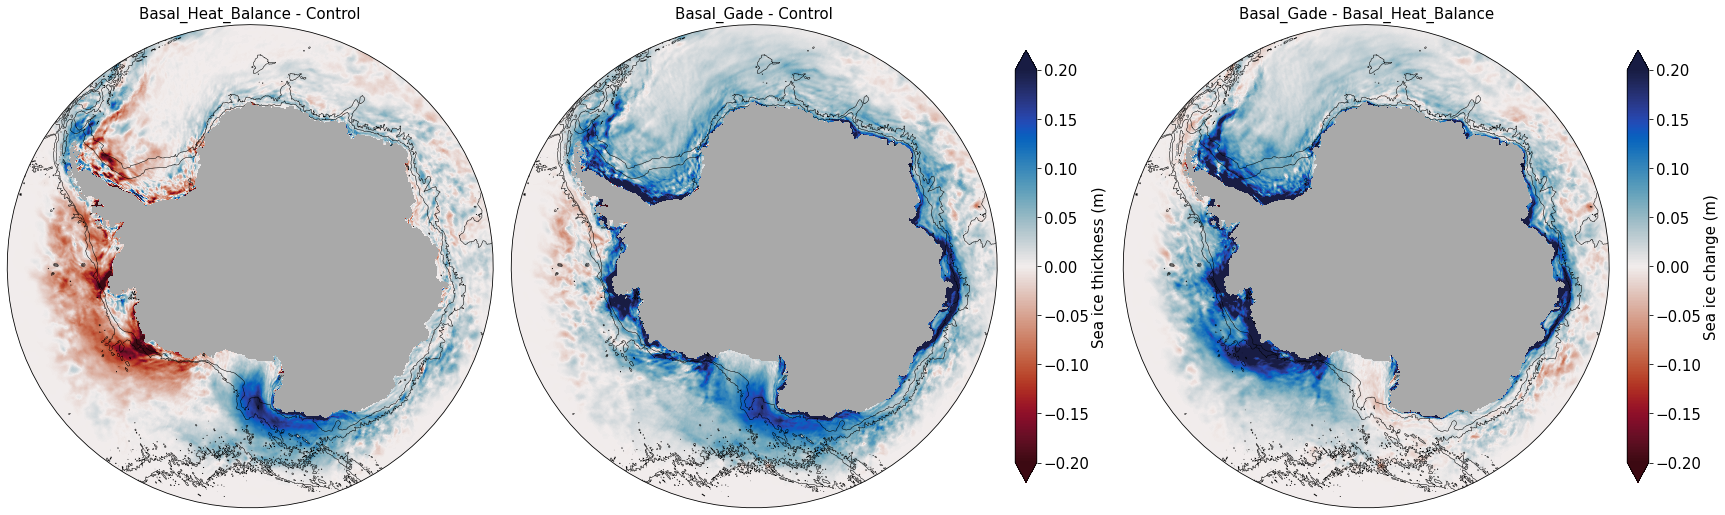

In [15]:
scale_max = 0.2

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)
norm2 = col.Normalize(vmin=0,vmax=0.96)

# Control
# setup stereo projection:
ax = fig.add_axes([0.0, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
## plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, hi_Tfreezing_min_calv_2_avet - hi_con_avet, norm=norm,  
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Heat_Balance - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())


# Tfreezing_min
# setup stereo projection:
ax = fig.add_axes([0.28, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
## plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, hi_Tfreezing_min_calv_2_gade_avet - hi_con_avet, norm=norm,  
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Gade - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.56, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Sea ice thickness (m)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

# Difference
ax = fig.add_axes([0.62, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, (hi_Tfreezing_min_calv_2_gade_avet-hi_Tfreezing_min_calv_2_avet), norm = norm, 
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Gade - Basal_Heat_Balance',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.90, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Sea ice change (m)',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

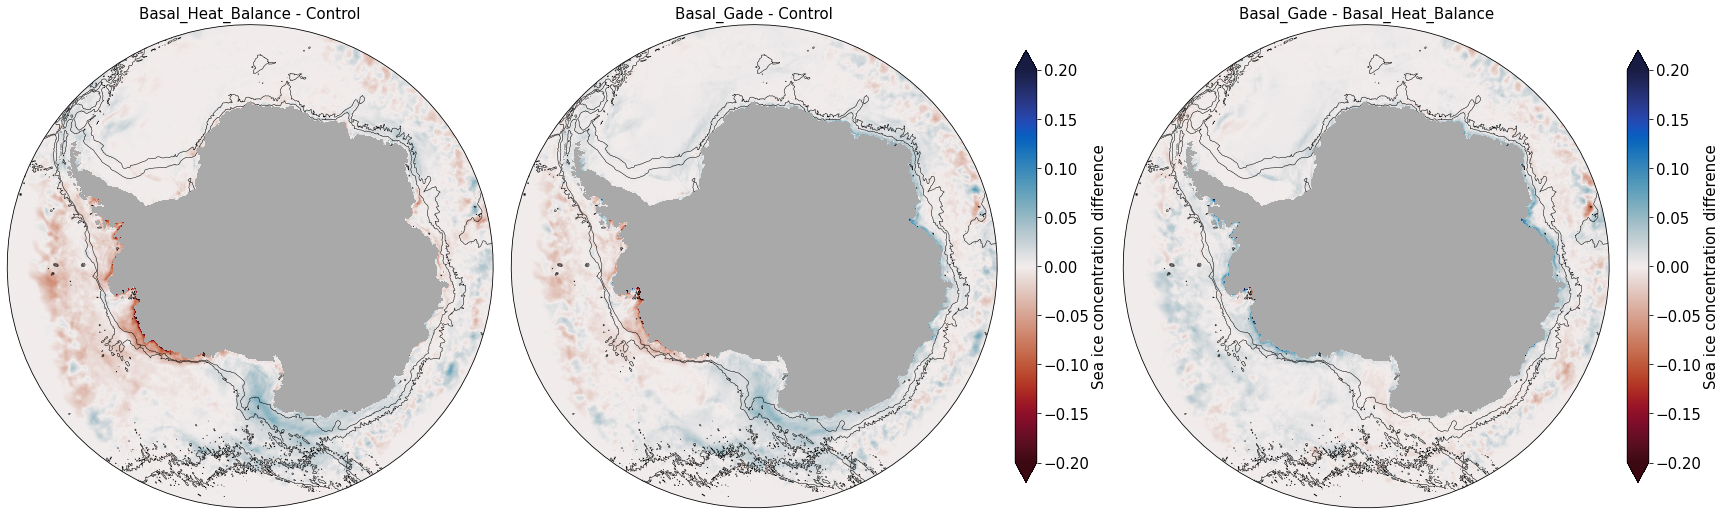

In [117]:
scale_max = 0.2

fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)
norm2 = col.Normalize(vmin=0,vmax=0.96)

# Control
# setup stereo projection:
ax = fig.add_axes([0.0, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
## plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, aice_Tfreezing_min_calv_2_avet - aice_con_avet, norm=norm,  
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Heat_Balance - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())


# Tfreezing_min
# setup stereo projection:
ax = fig.add_axes([0.28, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
## plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, aice_Tfreezing_min_calv_2_gade_avet - aice_con_avet, norm=norm,  
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Gade - Control',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.56, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Sea ice concentration difference',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

# Difference
ax = fig.add_axes([0.62, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, (aice_Tfreezing_min_calv_2_gade_avet-aice_Tfreezing_min_calv_2_avet), norm = norm, 
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Gade - Basal_Heat_Balance',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.90, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Sea ice concentration difference',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

In [55]:
#Time series

In [56]:
# shelf masking:
contour_file = np.load('/g/data/ik11/grids/Antarctic_slope_contour_1000m.npz')
shelf_mask = contour_file['contour_masked_above']
yt_ocean = contour_file['yt_ocean']
xt_ocean = contour_file['xt_ocean']
# Mask values that are non-zero
shelf_mask[np.where(shelf_mask!=0)] = np.nan
shelf_mask = shelf_mask+1
shelf_mask = xr.DataArray(shelf_mask, coords = [('yt_ocean', yt_ocean), ('xt_ocean', xt_ocean)])

In [57]:
# Multiply the variable with the mask, we need to account for the shape of the mask. 
# The mask uses a northern cutoff of 59S.
vi_con_shelf  = vi_con * shelf_mask.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)
vi_con_shelf = vi_con_shelf.load()

vi_Tfreezing_min_calv_2_shelf  = vi_Tfreezing_min_calv_2 * shelf_mask.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)
vi_Tfreezing_min_calv_2_shelf = vi_Tfreezing_min_calv_2_shelf.load()

vi_Tfreezing_min_calv_2_gade_shelf  = vi_Tfreezing_min_calv_2_gade * shelf_mask.sel(yt_ocean=lat_slice).sel(xt_ocean=lon_slice)
vi_Tfreezing_min_calv_2_gade_shelf = vi_Tfreezing_min_calv_2_gade_shelf.load()

In [58]:
vi_con_shelf_cpolar  = vi_con_shelf.sum('xt_ocean').sum('yt_ocean')
vi_Tfreezing_min_calv_2_shelf_cpolar = vi_Tfreezing_min_calv_2_shelf.sum('xt_ocean').sum('yt_ocean')
vi_Tfreezing_min_calv_2_gade_shelf_cpolar = vi_Tfreezing_min_calv_2_gade_shelf.sum('xt_ocean').sum('yt_ocean')

In [59]:
vi_con_shelf_cpolar_a = vi_con_shelf_cpolar.mean('time')
vi_Tfreezing_min_calv_2_shelf_cpolar_a = vi_Tfreezing_min_calv_2_shelf_cpolar.mean('time')
vi_Tfreezing_min_calv_2_gade_shelf_cpolar_a = vi_Tfreezing_min_calv_2_gade_shelf_cpolar.mean('time')

In [60]:
#Plotting

In [61]:
# Month labels
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Panel labels
panel_name = ['A', 'B', 'C', 'D', 'E', 'F']
# Font size
plt.rcParams['font.size'] = 14
# Axes
plt.rcParams['axes.facecolor']  = 'white'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
# Saving parameters
plt.rcParams['savefig.dpi']  = 150
plt.rcParams['savefig.bbox'] = 'tight'

(0.0, 36.0)

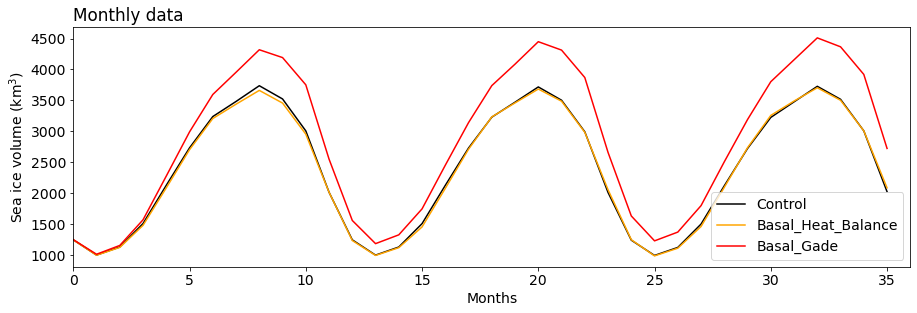

In [62]:
fig = plt.figure(figsize=(15,15))

plt.subplot(311)
plt.title('Monthly data', loc='left')
plt.plot(vi_con_shelf_cpolar, color='k', label='Control')
plt.plot(vi_Tfreezing_min_calv_2_shelf_cpolar, color='orange', label='Basal_Heat_Balance')
plt.plot(vi_Tfreezing_min_calv_2_gade_shelf_cpolar, color='red', label='Basal_Gade')


plt.legend()
plt.xlabel('Months')
plt.ylabel('Sea ice volume (km$^3$)')
plt.xlim(0,36)

(0.0, 5.0)

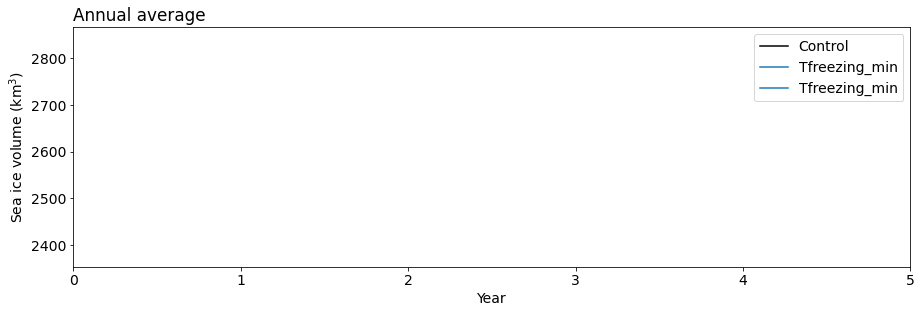

In [63]:
fig = plt.figure(figsize=(15,15))

plt.subplot(311)
plt.title('Annual average', loc='left')
plt.plot(vi_con_shelf_cpolar_a, color='k', label='Control')
plt.plot(vi_Tfreezing_min_calv_2_shelf_cpolar_a, color='C0', label='Tfreezing_min')
plt.plot(vi_Tfreezing_min_calv_2_gade_shelf_cpolar_a, color='C0', label='Tfreezing_min')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sea ice volume (km$^3$)')
plt.xlim(0,5)

NameError: name 'vi_con_shelf_cpolar_sum' is not defined

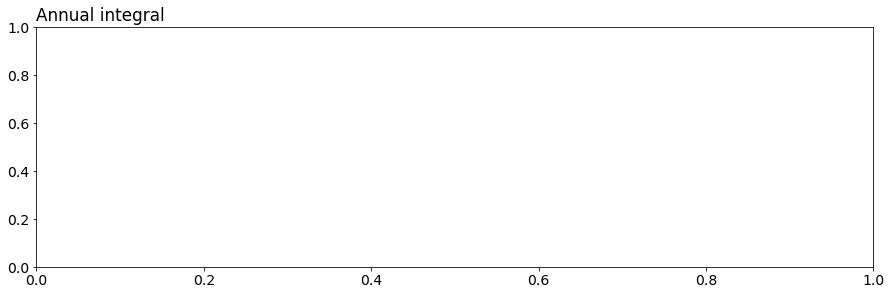

In [64]:
fig = plt.figure(figsize=(15,15))

plt.subplot(311)
plt.title('Annual integral', loc='left')
plt.plot(vi_con_shelf_cpolar_sum, color='k', label='Control')
plt.plot(vi_Tfreezing_min_shelf_cpolar_sum, color='C0', label='Tfreezing_min')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sea ice volume (km$^3$)')
plt.xlim(0,5)

## Cover area

**BUG**: this is the extent (not area), with a threshold of 0%

TODO: re-do as area (sum of SIC times cell area)

In [66]:
import numpy.ma as ma

In [67]:
area_t = area_t.sel(yt_ocean=lat_slice)

aa = ma.masked_where(hi_con==0,hi_con)  ## TODO: fix this
cover_area = aa * area_t
bb = np.where(cover_area!=cover_area)
cover_area[bb] = 0
cover_area_sum_con = hi_con[:,0,0]*0
for tt in range(cover_area.shape[0]):
    cover_area_sum_con[tt] = cover_area[tt].sum()

In [68]:
aa = ma.masked_where(hi_Tfreezing_min_calv_2==0,hi_Tfreezing_min_calv_2)
cover_area = aa * area_t
bb = np.where(cover_area!=cover_area)
cover_area[bb] = 0
cover_area_sum_Tfreezing_min_calv_2 = hi_Tfreezing_min_calv_2[:,0,0]*0
for tt in range(cover_area.shape[0]):
    cover_area_sum_Tfreezing_min_calv_2[tt] = cover_area[tt].sum()

In [69]:
aa = ma.masked_where(hi_Tfreezing_min_calv_2_gade==0,hi_Tfreezing_min_calv_2_gade)
cover_area = aa * area_t
bb = np.where(cover_area!=cover_area)
cover_area[bb] = 0
cover_area_sum_Tfreezing_min_calv_2_gade = hi_Tfreezing_min_calv_2_gade[:,0,0]*0
for tt in range(cover_area.shape[0]):
    cover_area_sum_Tfreezing_min_calv_2_gade[tt] = cover_area[tt].sum()

In [70]:
obs = [7,3.5,3.2,5.5,8.25,12,15,17.2,18,18.5,17.5,13.5]
obs2 = [3.5,2,3.5,6,9,12,14.5,16,15.5,15,12,7]

Text(0.5, 1.0, 'Sea ice Area over the Antarctica')

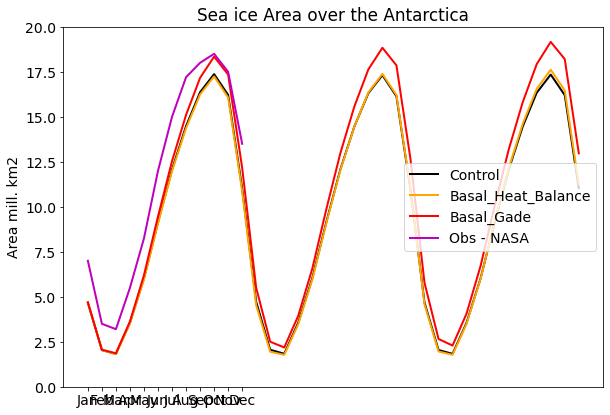

In [71]:
fig  = plt.figure(1, figsize = (25,5))
ax = fig.add_axes([0.0, 0.0, 0.3, 1])

ax.plot(cover_area_sum_con[0:]/1e12,lw=2,color='k',label="Control")
ax.plot(cover_area_sum_Tfreezing_min_calv_2[0:]/1e12,lw=2,color='orange',label='Basal_Heat_Balance')
ax.plot(cover_area_sum_Tfreezing_min_calv_2_gade[0:]/1e12,lw=2,color='red',label='Basal_Gade')
ax.plot(obs,lw=2,color='m',label="Obs - NASA")
#ax.plot(obs2,lw=2,color='r',label="Obs - EUMETSAT")
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.ylabel("Area mill. km2")
#plt.xlabel("Months")
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.ylim(ymin=0,ymax=20)
plt.title("Sea ice Area over the Antarctica")

## Regridders
based on https://nbviewer.org/github/aekiss/ice_analysis/blob/main/ice_maps.ipynb#Regridders

see https://cosima-recipes.readthedocs.io/en/latest/documented_examples/Regridding.html and https://xesmf.readthedocs.io

In [114]:
import xesmf
import os
import pandas as pd
import calendar
from tqdm import tqdm_notebook

In [6]:
def G02202_obs_regridder(grid_in, grid_out, method='bilinear', **kwargs):
    '''Return a function that takes one dataarray argument on grid_in and returns that dataarray regridded onto grid_out.
    
    grid_in -- path to a NSIDC G02202 NetCDF grid file
    grid_out -- path to a MOM grid file (tracer points are used)
    '''
    weightfn = '_'.join(['regrid', 'weights', os.path.splitext(os.path.basename(grid_in))[0],
                         'to', os.path.splitext(os.path.basename(grid_out))[0], method])+'.nc'
    ds_in = xr.open_dataset(grid_in)\
             .rename({'xgrid': 'x', 'ygrid': 'y',
                     'longitude': 'lon', 'latitude': 'lat'})
    try: # for /g/data/ik11/grids/ocean_grid_10.nc and /g/data/ik11/grids/ocean_grid_025.nc
        ds_out = xr.open_dataset(grid_out).rename({'xt_ocean': 'x', 'yt_ocean': 'y', 'geolon_t': 'lon', 'geolat_t': 'lat'})
    except ValueError: # for /g/data/ik11/grids/ocean_grid_01.nc - see https://github.com/COSIMA/access-om2/issues/236
        ds_out = xr.open_dataset(grid_out).rename({'grid_x_T': 'x', 'grid_y_T': 'y', 'geolon_t': 'lon', 'geolat_t': 'lat'})
        ds_out_fix = xr.open_dataset('/g/data/ik11/outputs/access-om2-01/01deg_jra55v140_iaf_cycle3/output488/ocean/ocean-3d-temp-1-daily-mean-ym_1958_01.nc')\
                    .rename({'xt_ocean': 'x', 'yt_ocean': 'y'})
        ds_out = ds_out.assign_coords({'x': ds_out_fix['x'], 'y': ds_out_fix['y']})

    # make regridder
    rg = xesmf.Regridder(ds_in, ds_out, method=method, reuse_weights=os.path.exists(weightfn), filename=weightfn, **kwargs)

    def outf(da): # define regridding function to output
        outds = rg(da)
        outds.coords['x'] = ds_out['x']
        outds.coords['y'] = ds_out['y']
        return outds.rename({'x': 'xt_ocean', 'y': 'yt_ocean', 'lon': 'longitude', 'lat': 'latitude'})

    return outf

In [7]:
obsfile_SH = '/g/data3/hh5/tmp/cosima/observations/NOAA/G02202_V3/south/monthly/seaice_conc_monthly_sh_f08_198708_v03r01.nc'
regrid_SHobs_to_01 = G02202_obs_regridder(obsfile_SH, '/g/data/ik11/grids/ocean_grid_01.nc')

## Sea ice concentration
based on https://nbviewer.org/github/aekiss/ice_analysis/blob/main/ice_maps.ipynb

In [78]:
timerange = slice(pd.to_datetime('1990-05-01', format='%Y-%m-%d'),
                  pd.to_datetime('1991-04-30', format='%Y-%m-%d'))  # RYF: 1 May 1990 - 30 April 1991

In [79]:
def get_sic_obs(pattern, path='/g/data3/hh5/tmp/cosima/observations/NOAA/G02202_V3', # from http://nsidc.org/data/G02202
                variable='goddard_merged_seaice_conc_monthly', timerange=timerange): 
    '''
    Return a dataarray from the nc files in path/pattern.
    '''
    dataarrays = []
    files = glob.glob(os.path.join(path, pattern))
    for f in tqdm_notebook(files, leave=False, desc='opening files'):
        dataarrays.append(xr.open_dataset(f, decode_times=False)[variable])
    dataarray = xr.concat(dataarrays, dim='time', coords='all')
    if 'time' in dataarray.coords:
        time_units = dataarray.time.units
        decoded_time = xr.conventions.times.decode_cf_datetime(dataarray.time, time_units)
        dataarray.coords['time'] = ('time', decoded_time,
                                    {'long_name': 'time', 'decoded_using': time_units })

    # replace values outside valid range with nan
    dataarray = dataarray.where(xr.ufuncs.logical_and(dataarray>=0, dataarray<=1)) #, np.nan)
    
    # use the same coord names as access-om2 t grid
    dataarray = dataarray.rename(({'xgrid': 'xt_ocean', 'ygrid': 'yt_ocean'}))
    
    # sort by time and select timerange
    dataarray = dataarray.sortby('time').sel(time=timerange)

    return dataarray

In [80]:
def obs_mm(obs, groupby='time.month'):
    cobs = obs.groupby(groupby).mean('time', skipna=True)
    cobs = cobs.assign_coords({'latitude': obs.latitude.isel(time=0),
                              'longitude': obs.longitude.isel(time=0)})
    return cobs

In [81]:
obs_SH = get_sic_obs('south/monthly/*.nc', timerange=timerange)

opening files:   0%|          | 0/493 [00:00<?, ?it/s]

In [82]:
obs_SH_mm = obs_mm(obs_SH)  # monthly climatologies
obs_SH_avet = obs_SH.mean('time', skipna=True)  # mean for all data

In [83]:
obs_SH_mm_regrid = regrid_SHobs_to_01(obs_SH_mm)
obs_SH_avet_regrid = regrid_SHobs_to_01(obs_SH_avet)

## plot SIC anomalies relative to obs (average over all months)

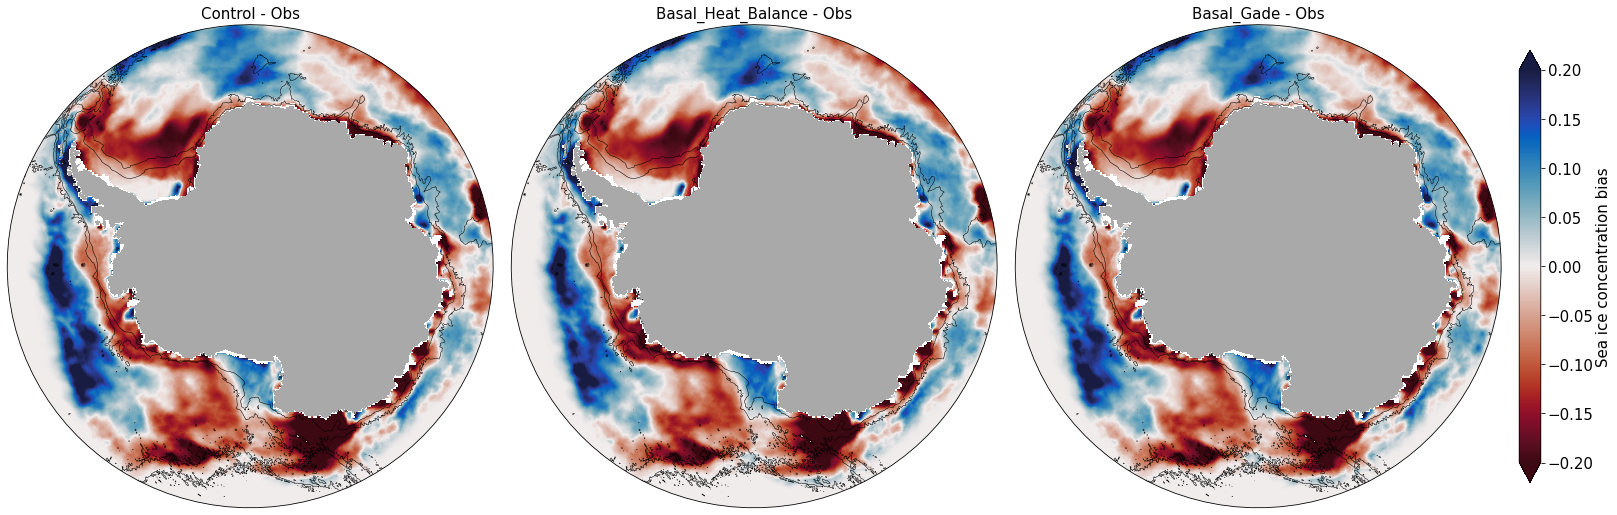

In [102]:
scale_max = 0.2
fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# Control
# setup stereo projection:
ax = fig.add_axes([0.0, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
## plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, aice_con_avet - obs_SH_avet_regrid, norm=norm,  
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Control - Obs',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# Tfreezing_min
# setup stereo projection:
ax = fig.add_axes([0.28, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
## plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, aice_Tfreezing_min_calv_2_avet - obs_SH_avet_regrid, norm=norm,  
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Heat_Balance - Obs',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# Gade
ax = fig.add_axes([0.56, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, (aice_Tfreezing_min_calv_2_gade_avet - obs_SH_avet_regrid), norm = norm, 
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Gade - Obs',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.84, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(r'Sea ice concentration bias',fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)

## plot SIC anomalies relative to obs (climatology over one month)

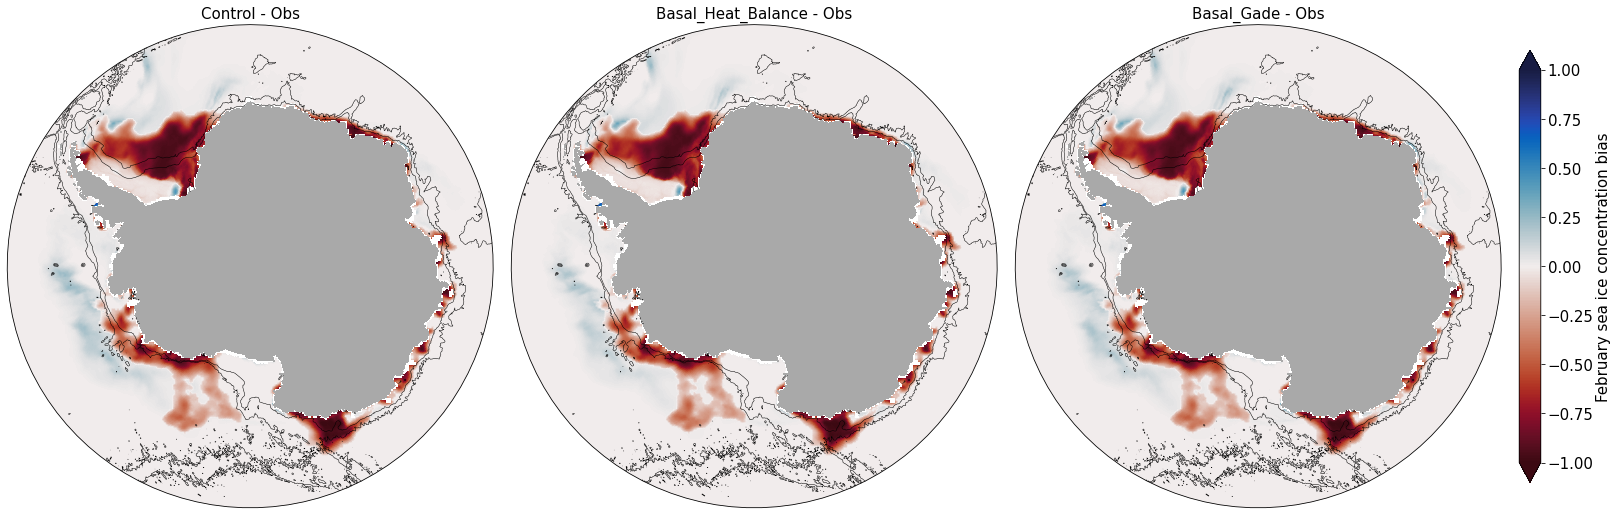

In [116]:
mo = 2 # Feb=2

scale_max = 1
fig  = plt.figure(1, figsize = (25,12))
norm = col.Normalize(vmin=-scale_max,vmax=scale_max)

# Control
# setup stereo projection:
ax = fig.add_axes([0.0, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
## plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, aice_con_mm.sel(month=mo) - obs_SH_mm_regrid.sel(month=mo), norm=norm,  
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Control - Obs',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# Tfreezing_min
# setup stereo projection:
ax = fig.add_axes([0.28, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
## plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, aice_Tfreezing_min_calv_2_mm.sel(month=mo) - obs_SH_mm_regrid.sel(month=mo), norm=norm,  
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Heat_Balance - Obs',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# Gade
ax = fig.add_axes([0.56, 0.0, 0.27, 1],projection=ccrs.SouthPolarStereo())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
# plot:
cf = ax.pcolormesh(hi_con.xt_ocean, hi_con.yt_ocean, (aice_Tfreezing_min_calv_2_gade_mm.sel(month=mo) - obs_SH_mm_regrid.sel(month=mo)), norm = norm, 
                   cmap = cmocean.balance_r, transform = ccrs.PlateCarree())
ax.contour(ht.xt_ocean,ht.yt_ocean,ht,levels=[1000,3000],colors='k',linewidths=0.5,transform = ccrs.PlateCarree())
plt.title('Basal_Gade - Obs',fontsize=fontsize)
ax.contourf(ht.xt_ocean, land_mask_lat,land_mask_masked,colors='darkgrey',
             zorder=2,transform = ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())

# colorbar:
cbaxes = fig.add_axes([0.84, 0.25, 0.012, 0.5])
cbar = plt.colorbar(cf, cax = cbaxes, orientation = 'vertical',extend = 'both')
cbar.set_label(' '.join([calendar.month_name[mo], r'sea ice concentration bias']),fontsize=fontsize,labelpad=2)
cbar.ax.tick_params(labelsize=fontsize)